In [1]:
import sys
sys.path.append("..")
from plots import *
import numpy as np
import pandas as pd
from datetime import timedelta

# load stock data
data = pd.read_csv('stock_data.csv', header=[
                   0, 1], index_col=0, parse_dates=True)
daily_returns = (data['Close'] / data['Close'].shift(1) - 1)[1:]

TEST_YEARS = 0
TRAIN_END_DATE = data.index.max() - timedelta(days=TEST_YEARS * 365)

train = daily_returns[(daily_returns.index < TRAIN_END_DATE)].fillna(0)
test = daily_returns[(daily_returns.index >= TRAIN_END_DATE)].fillna(0)

compare_files = [
    # '../.data/3000_403iter.json',
    # '../.data/3000_355iter.json',
    '../.data/3000_362iter.json',
    # '../.data/3000_opt_374iter.json',
    # '../.data/3000_opt_416iter.json',
    '../.data/3000_opt_468iter.json',
    # '../.data/3000_opt2_387iter.json',
    '../.data/3000_opt2_411iter.json',
    # '../.data/3000_opt2_456iter.json',
]

stats_lst, solutions_lst = zip(*[read_log(file) for file in compare_files])

labels = ['nsga-ii', 'select_opt', 'select_opt+dyn_mut+dyn_pop']
args = {
    'solutions_lst': solutions_lst,
    'train': train,
    'labels': labels
}

traces = read_traces()

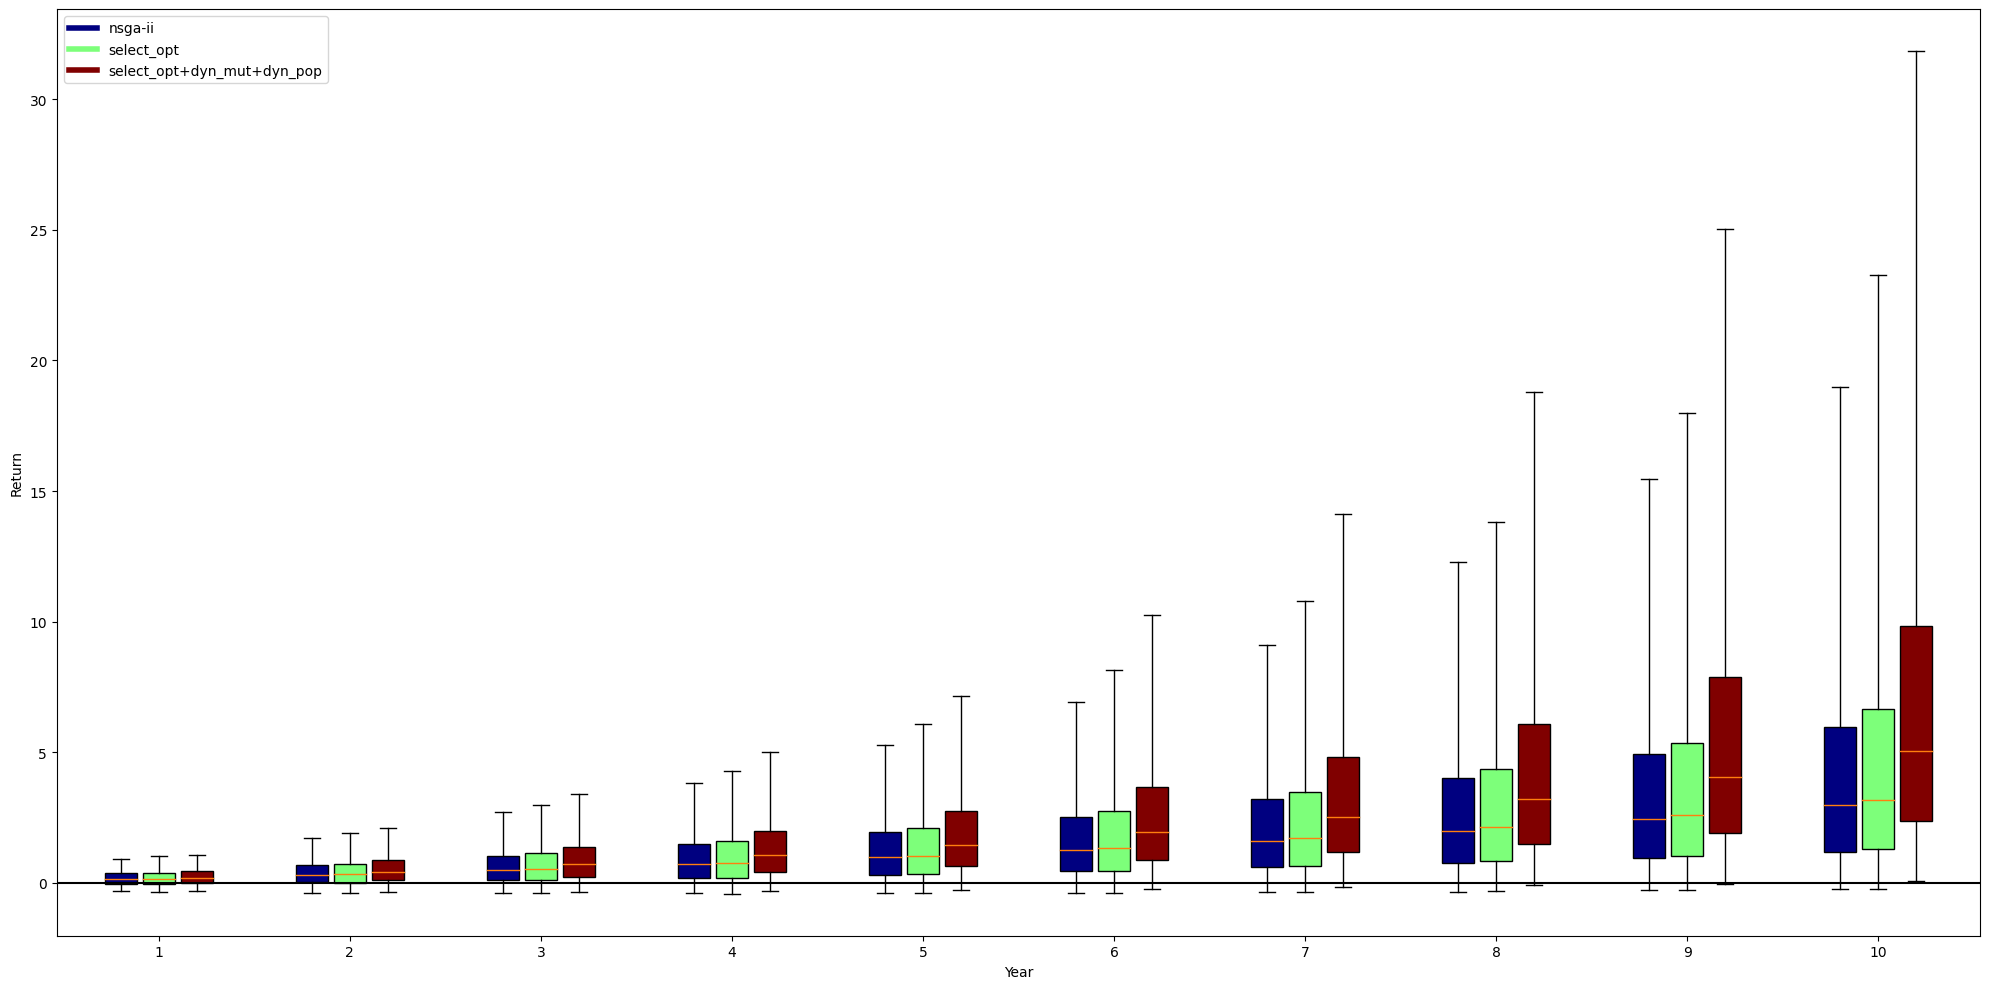

In [2]:
from optfolio.report import *
traces_lst = np.array([traces[key] for key in labels])
plot_traces_compare(traces_lst, labels)


==========nsga-ii=============


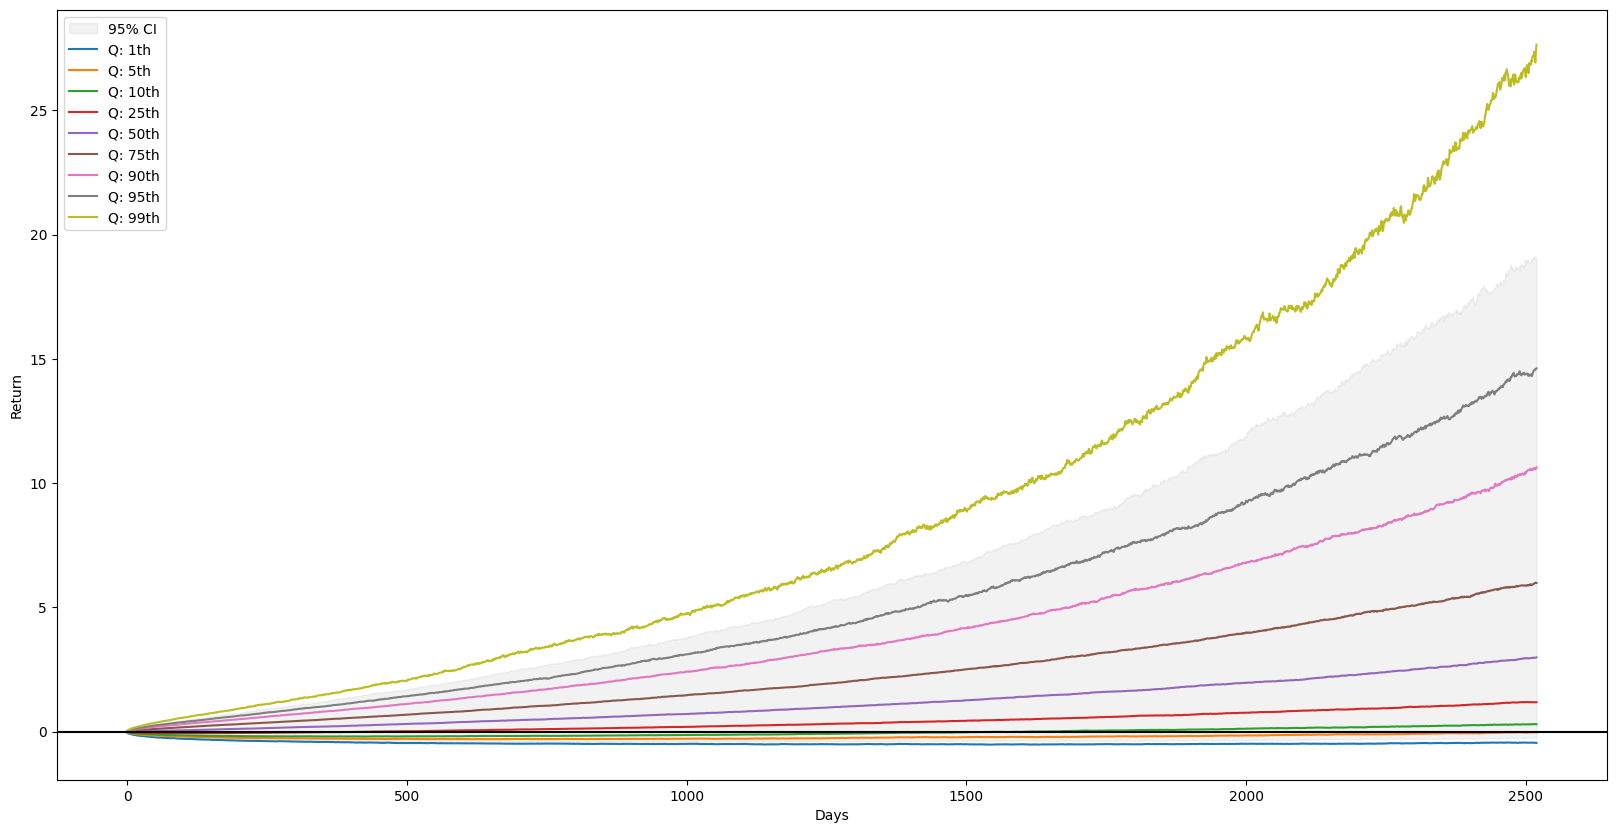

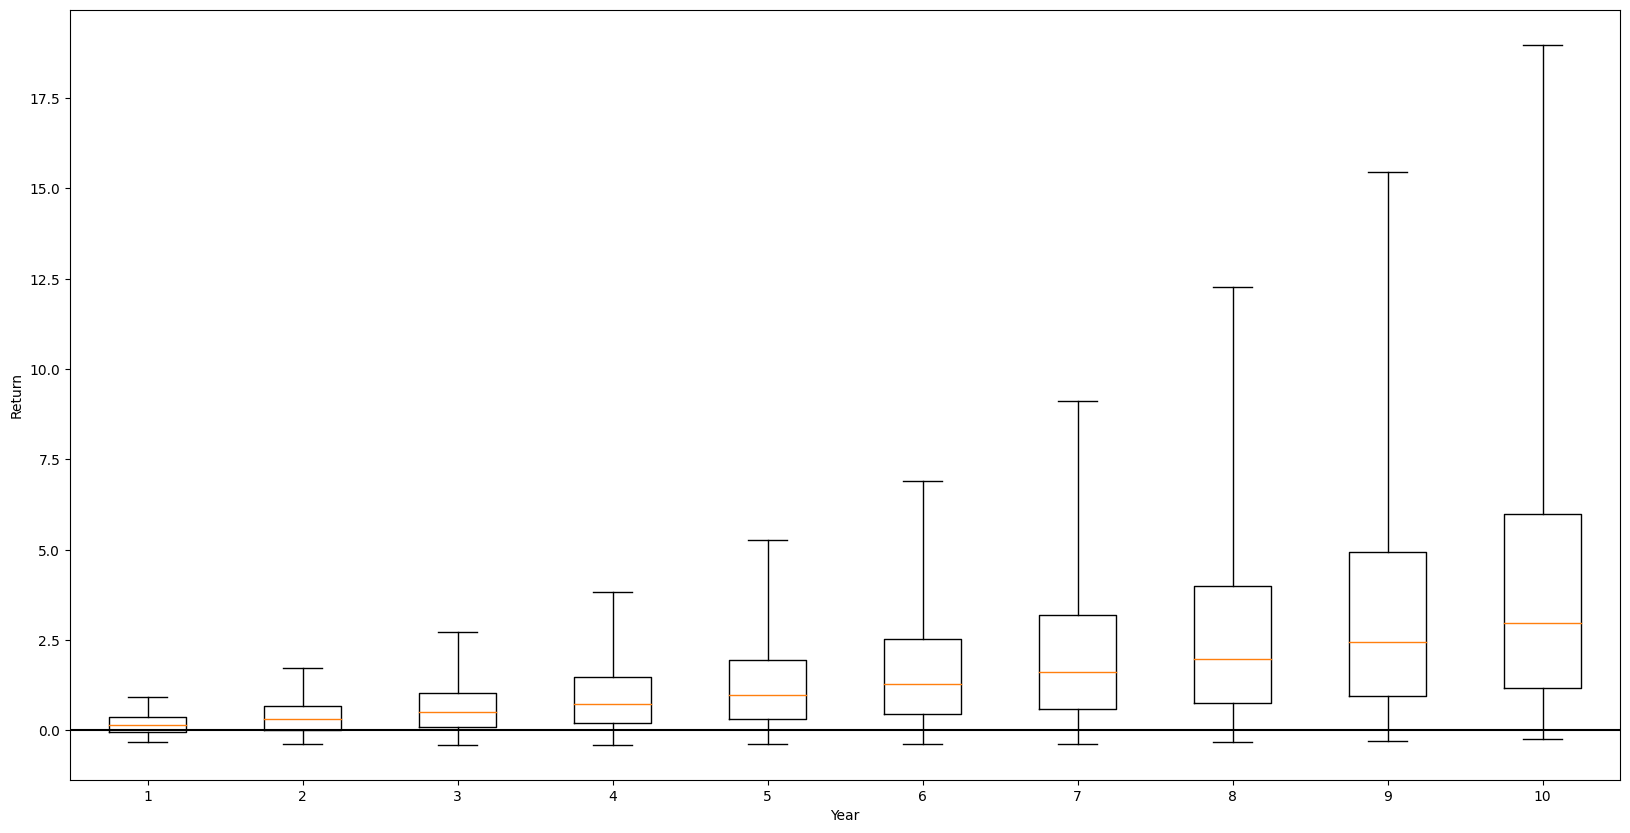

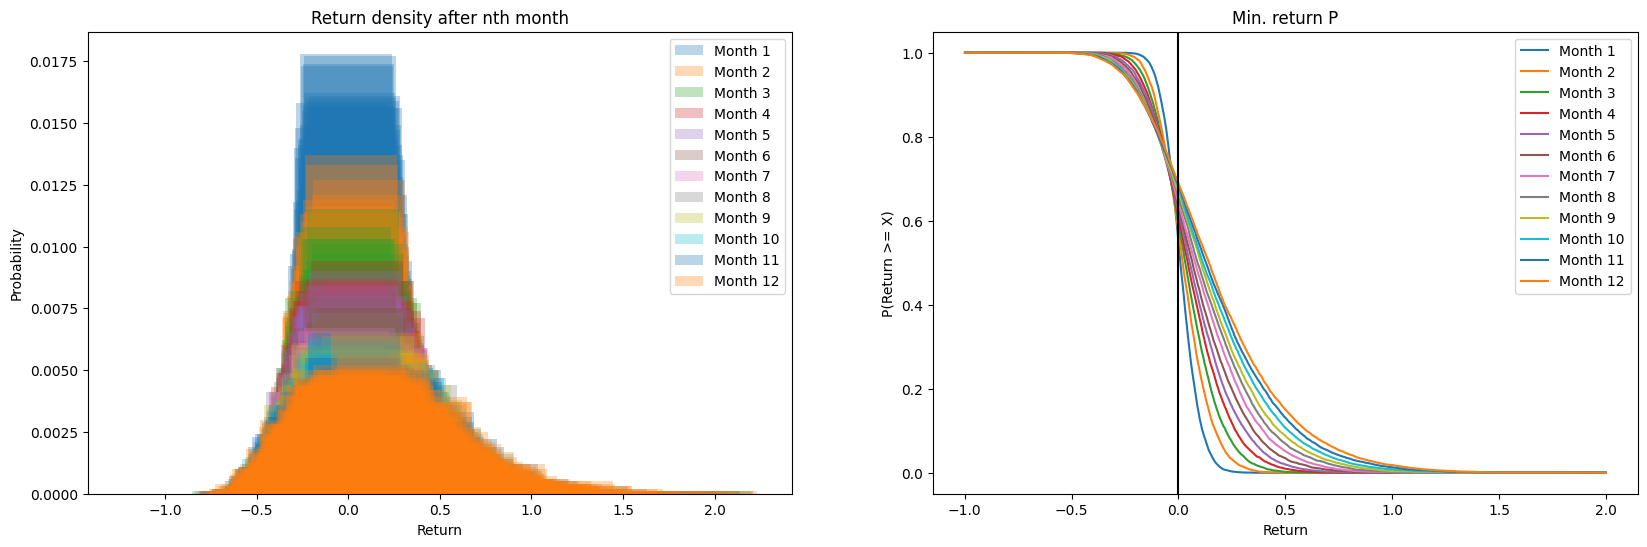

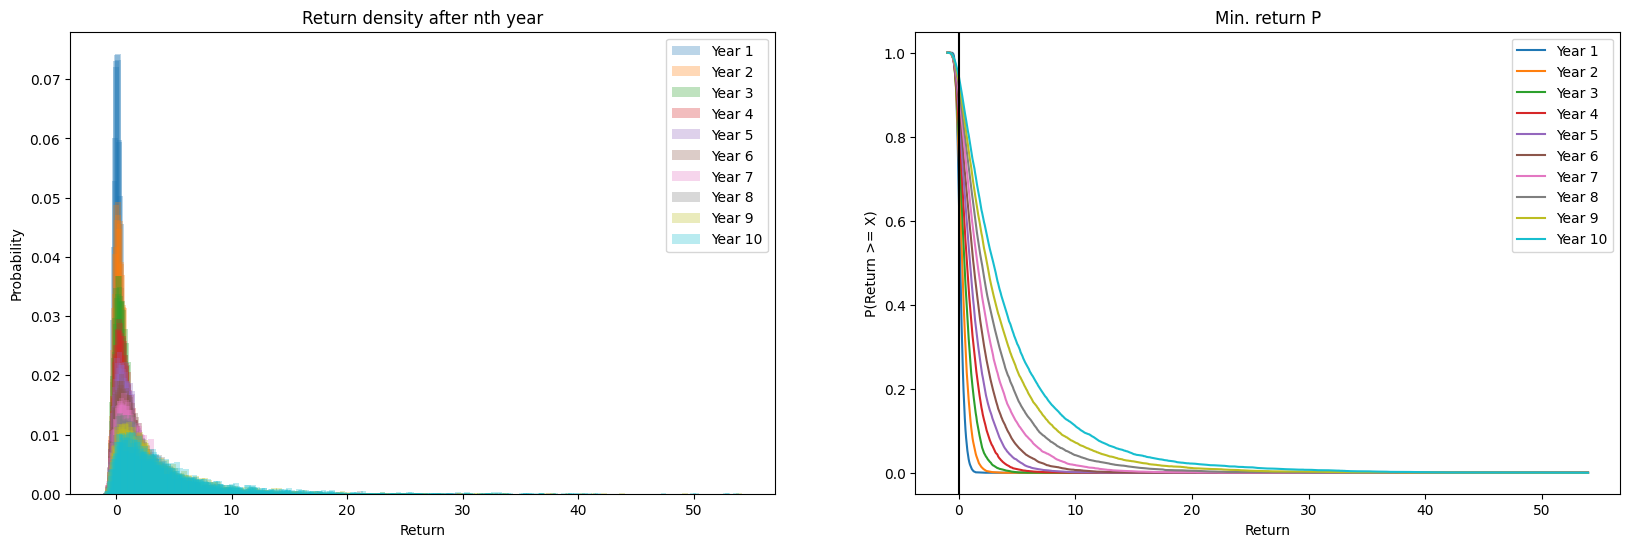

        < 0    > 0   >= 1   >= 2   >= 3   >= 4   >= 5   >= 6   >= 7   >= 8  \
Year                                                                         
1     30.86  69.14   1.87   0.03   0.00   0.00   0.00   0.00   0.00   0.00   
2     23.34  76.66  13.09   1.25   0.13   0.00   0.00   0.00   0.00   0.00   
3     18.54  81.46  26.84   6.34   1.71   0.59   0.11   0.02   0.00   0.00   
4     15.80  84.20  39.07  14.99   5.87   2.12   0.87   0.39   0.20   0.09   
5     12.77  87.23  49.45  23.97  12.20   5.72   3.05   1.43   0.78   0.42   
6     10.52  89.48  57.75  33.56  19.33  11.30   6.53   3.94   2.45   1.53   
7      8.93  91.07  64.07  42.44  27.35  17.93  12.02   8.22   5.56   3.96   
8      7.48  92.52  70.00  49.84  35.57  25.05  18.06  13.22   9.51   7.31   
9      6.46  93.54  74.24  56.57  42.31  32.38  24.63  18.88  14.61  11.39   
10     5.31  94.69  78.09  62.29  49.82  39.23  31.05  24.92  20.02  16.27   

       >= 9  >= 10  
Year                
1      0.00   0.00  


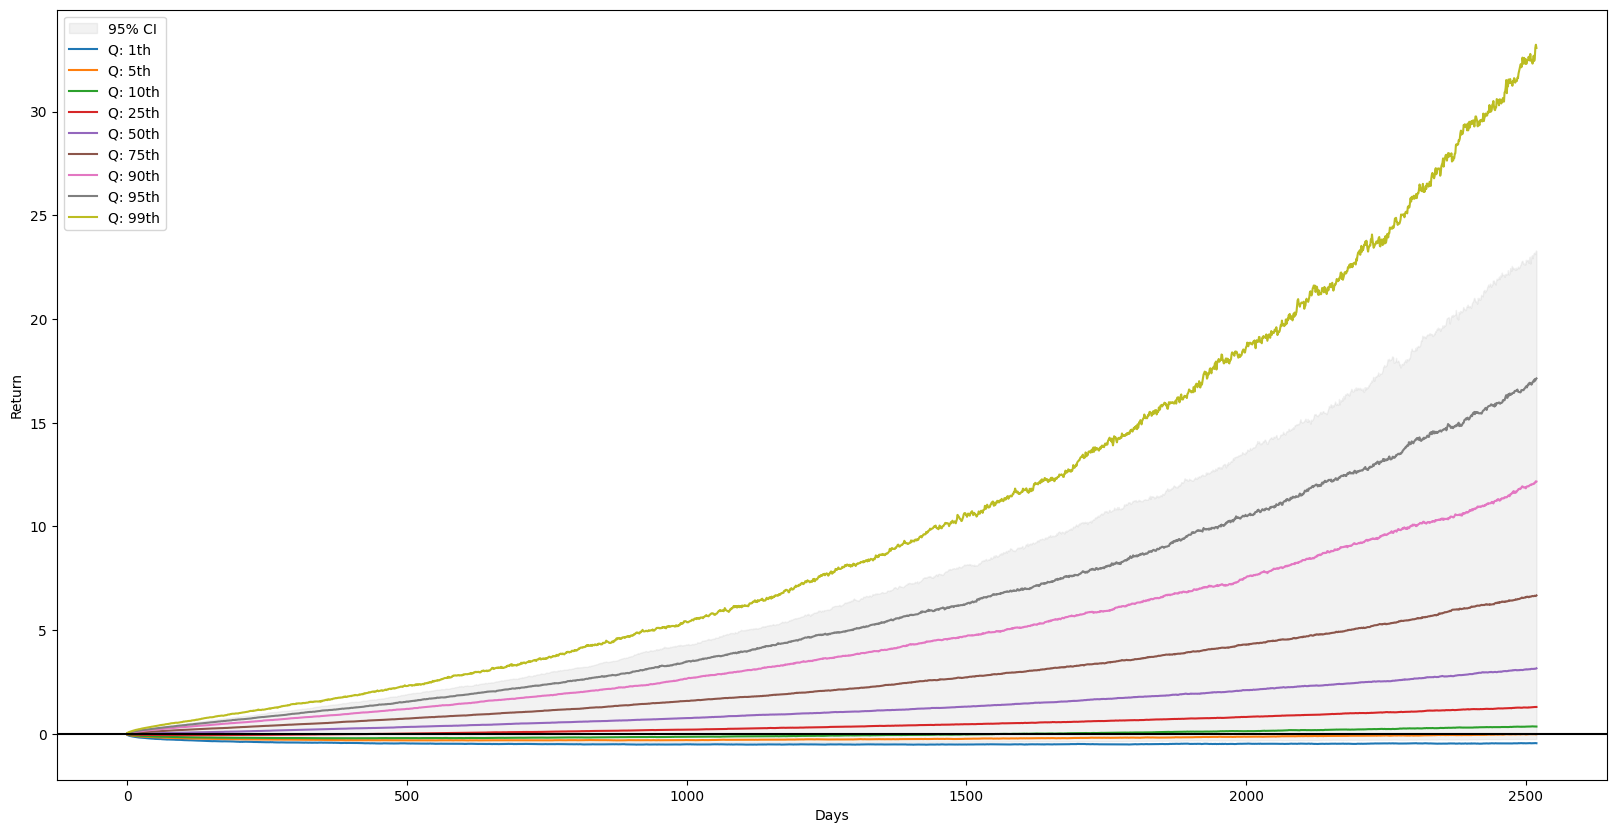

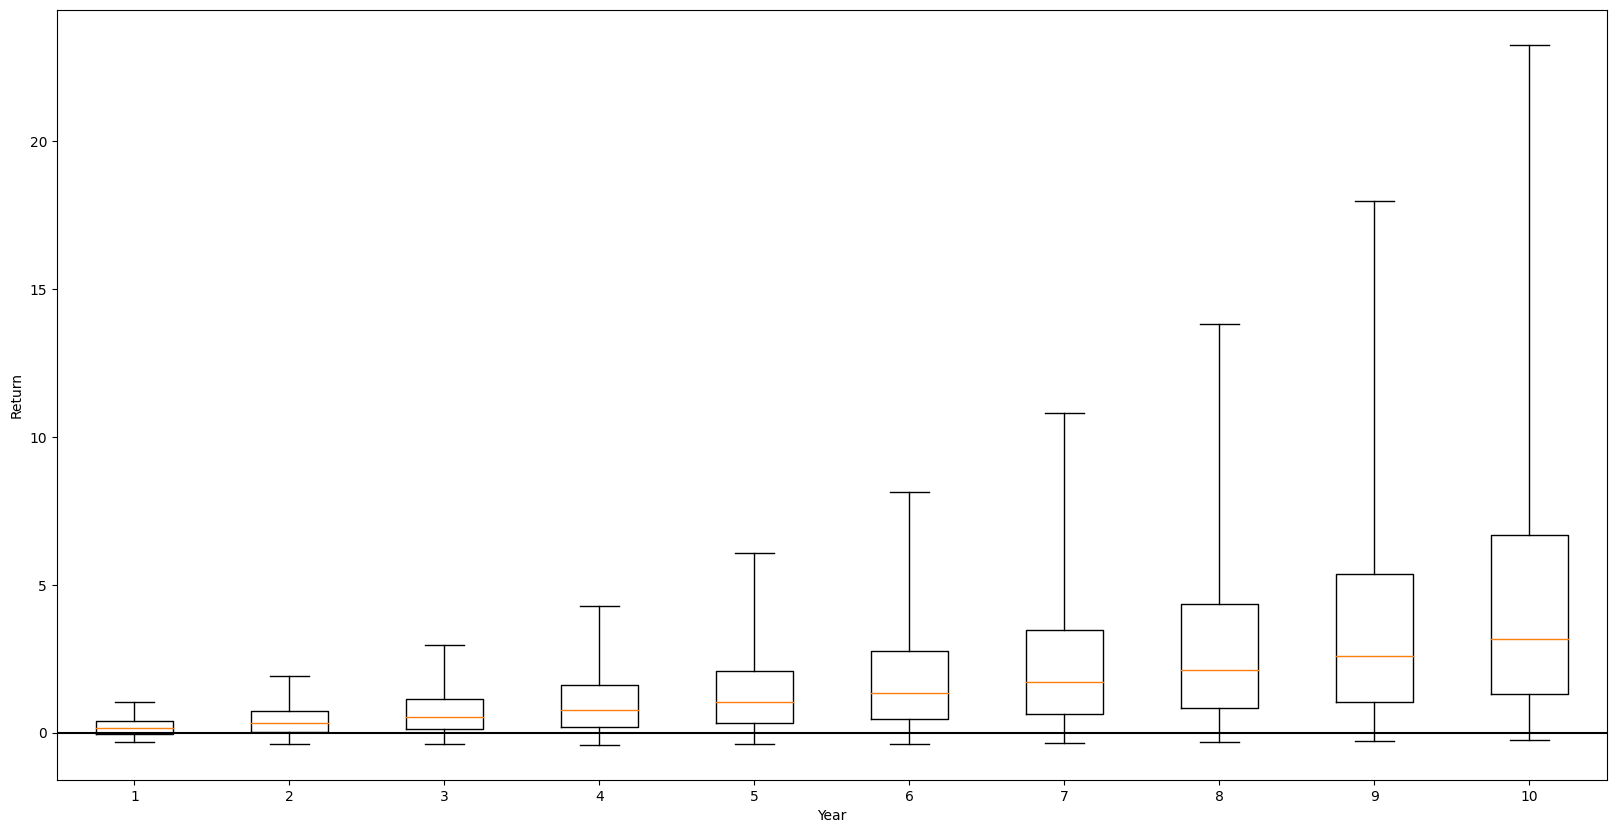

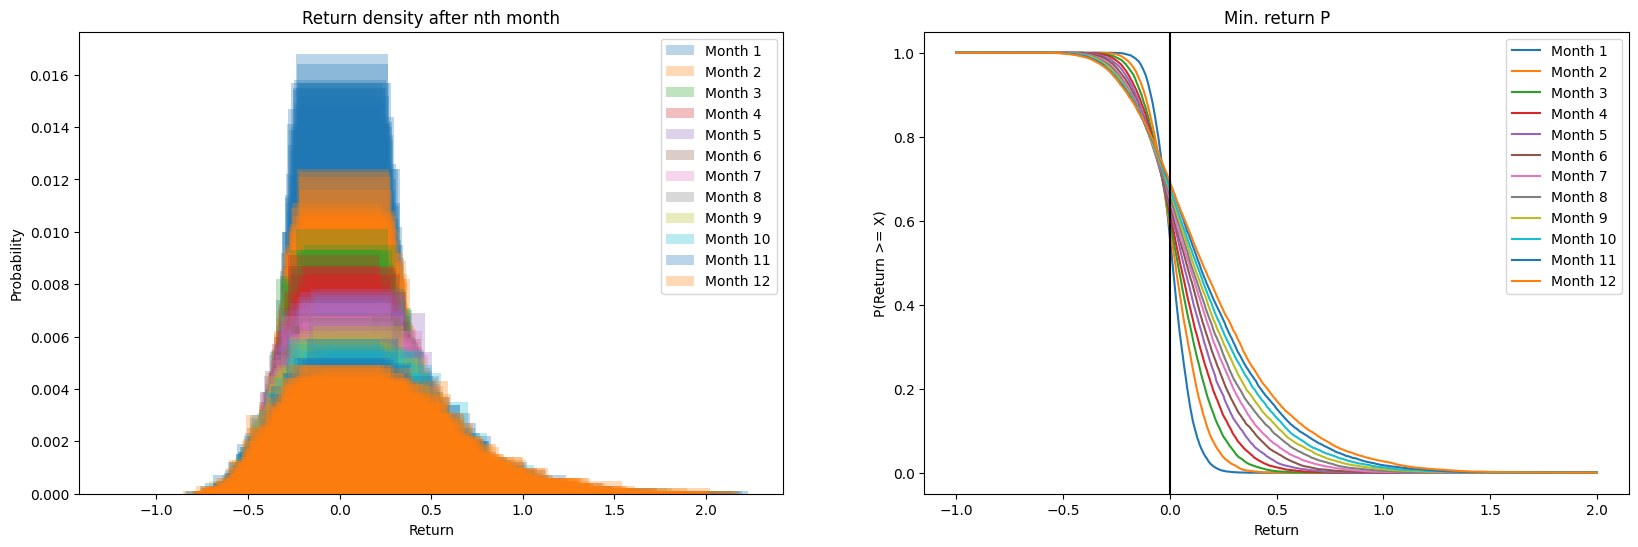

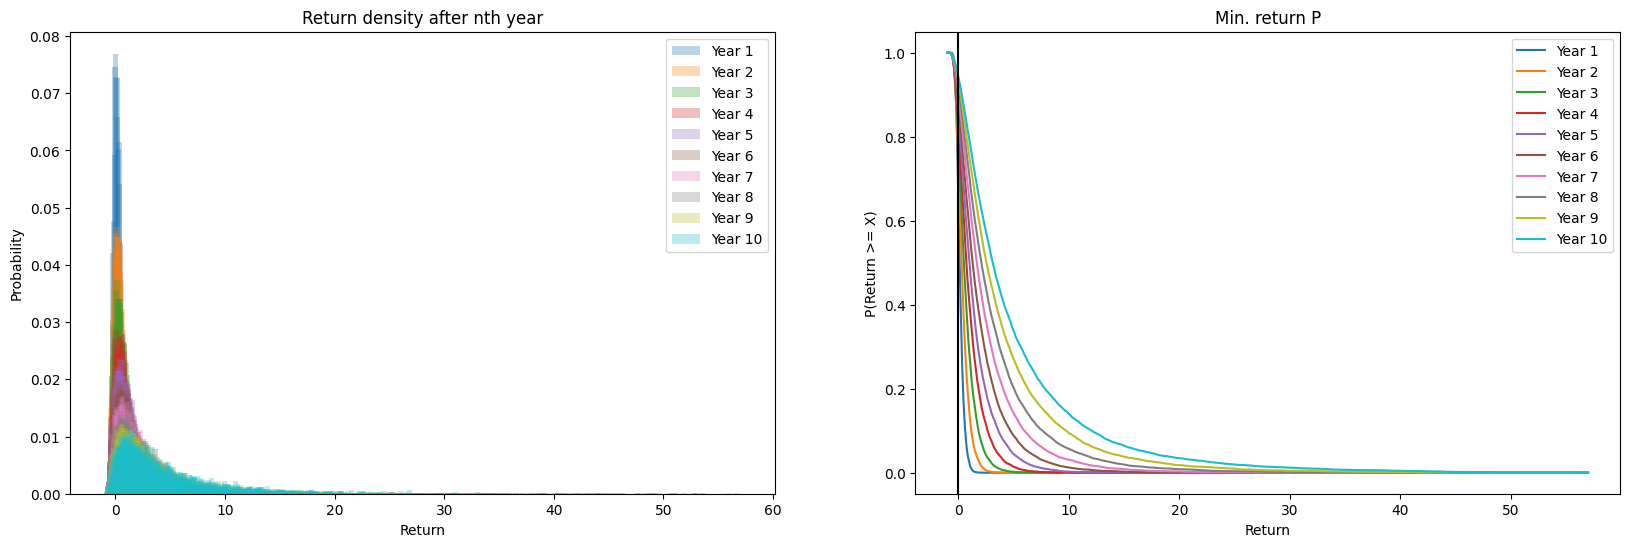

        < 0    > 0   >= 1   >= 2   >= 3   >= 4   >= 5   >= 6   >= 7   >= 8  \
Year                                                                         
1     30.46  69.54   2.73   0.03   0.00   0.00   0.00   0.00   0.00   0.00   
2     23.65  76.35  15.67   2.11   0.22   0.03   0.01   0.00   0.00   0.00   
3     18.70  81.30  29.55   8.39   2.39   0.66   0.22   0.08   0.02   0.02   
4     15.61  84.39  41.40  17.75   7.70   3.34   1.49   0.66   0.29   0.12   
5     12.47  87.53  51.46  26.53  14.57   8.15   4.50   2.61   1.46   0.92   
6     10.62  89.38  59.24  36.40  22.46  13.84   8.96   5.80   3.98   2.68   
7      8.56  91.44  65.98  44.54  30.12  20.71  14.45  10.04   7.27   5.28   
8      7.29  92.71  71.42  51.98  37.70  27.93  20.44  15.46  11.79   9.19   
9      5.94  94.06  75.89  58.53  44.94  34.84  27.43  21.62  17.37  14.26   
10     5.19  94.81  79.84  64.42  51.68  41.58  34.09  28.31  23.54  19.64   

       >= 9  >= 10  
Year                
1      0.00   0.00  


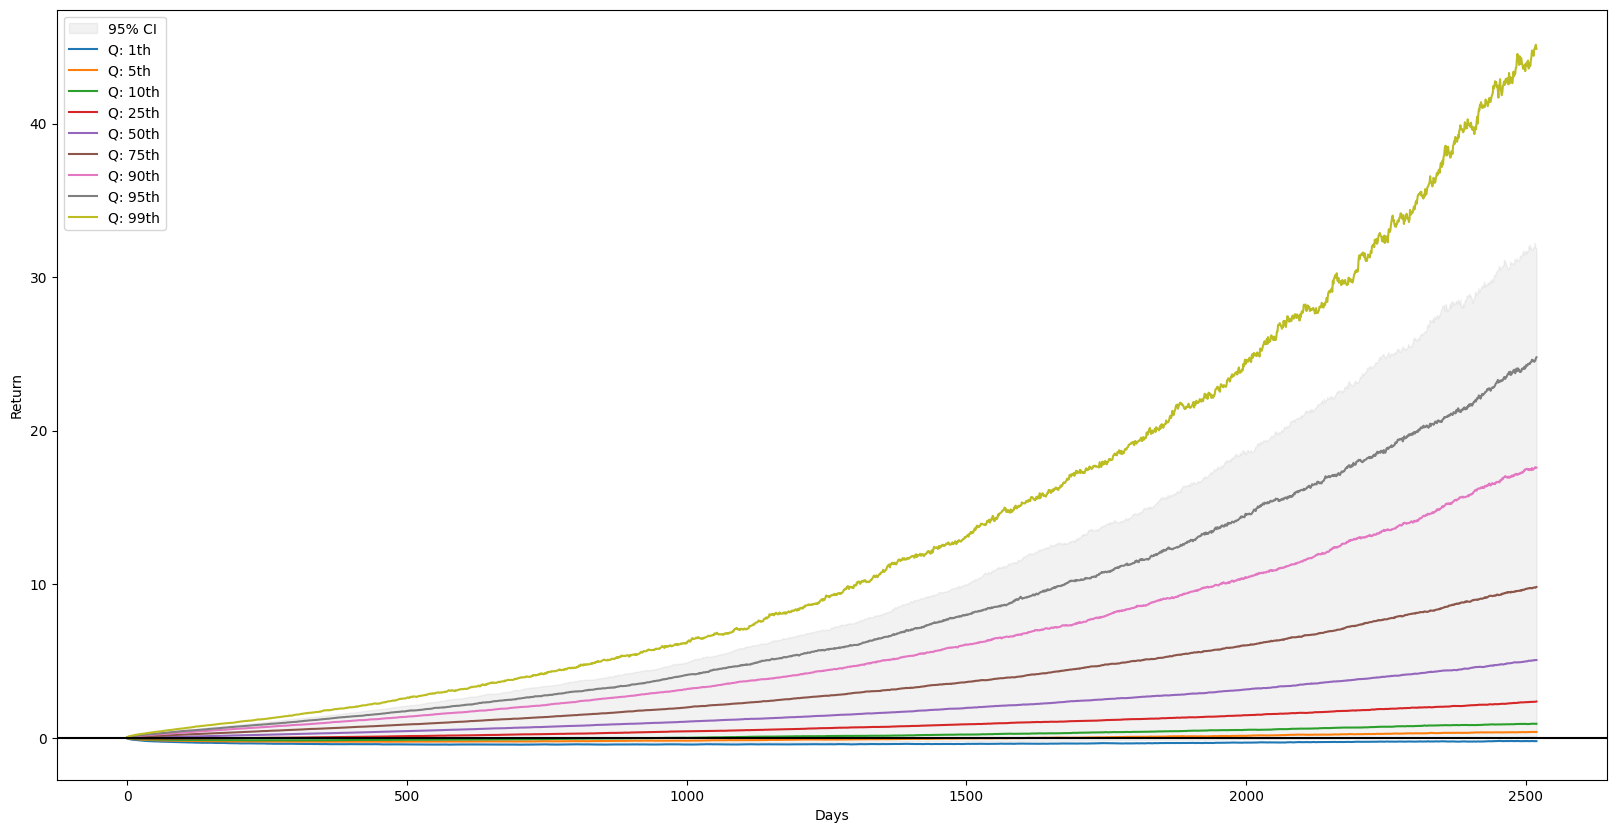

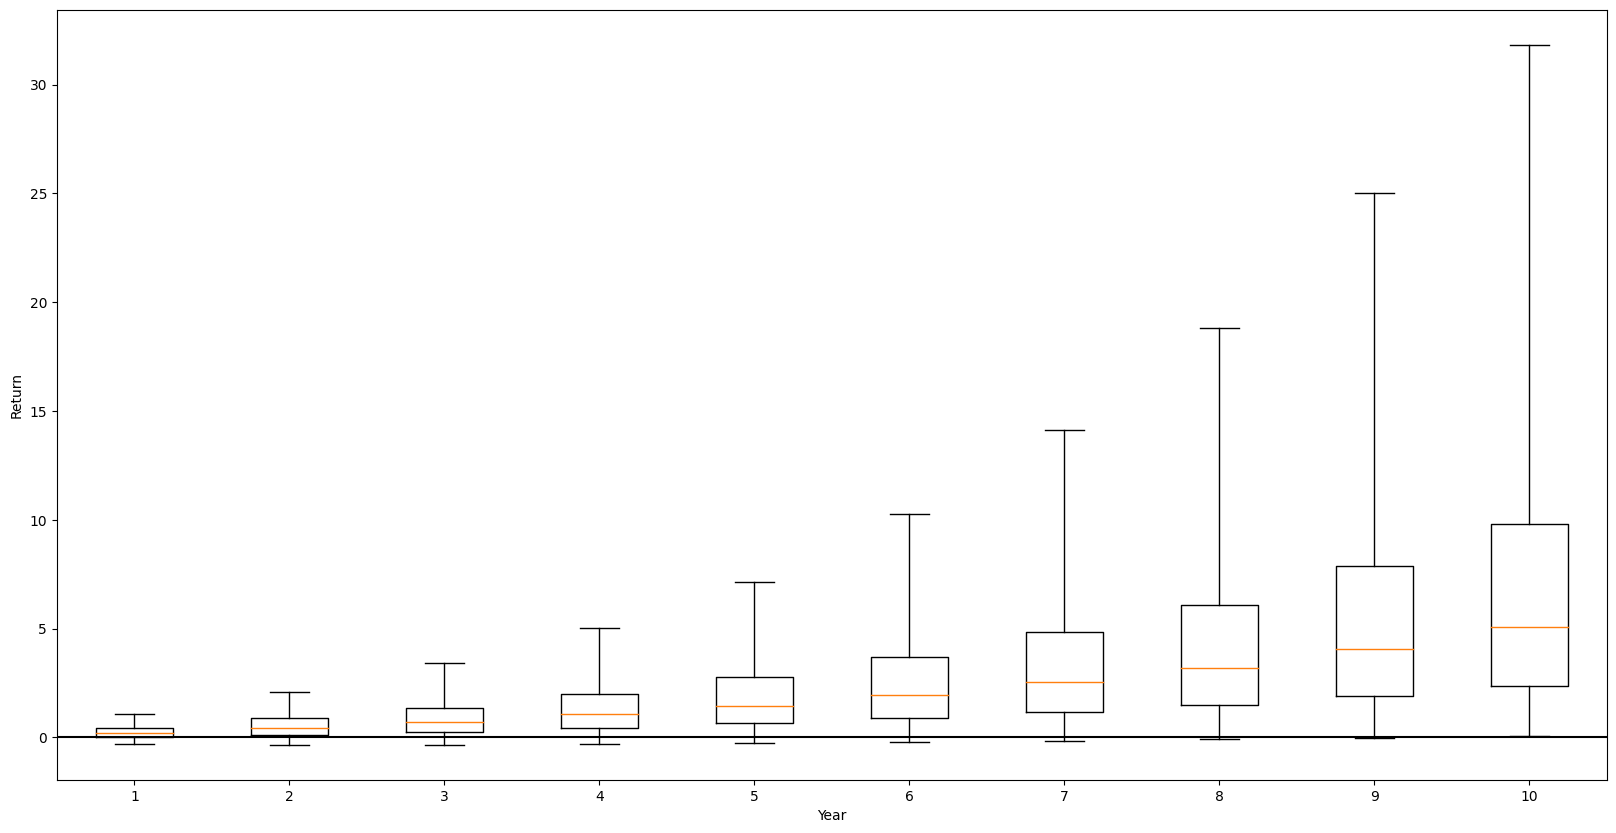

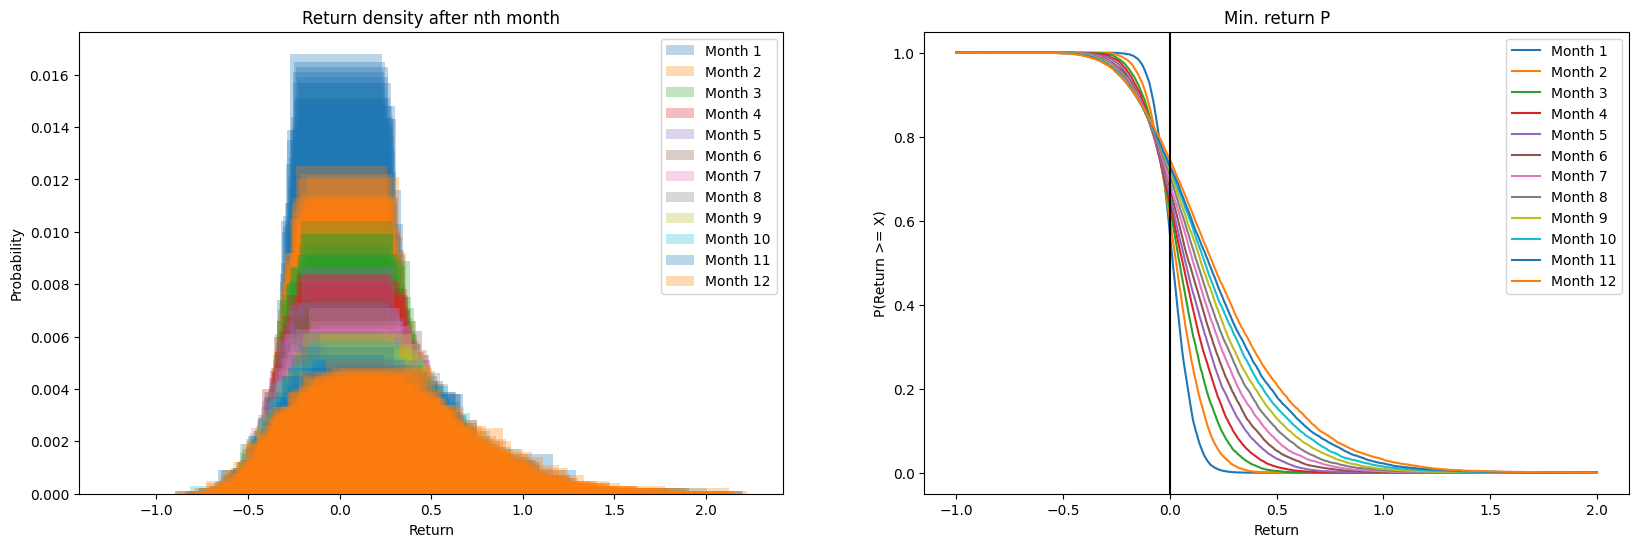

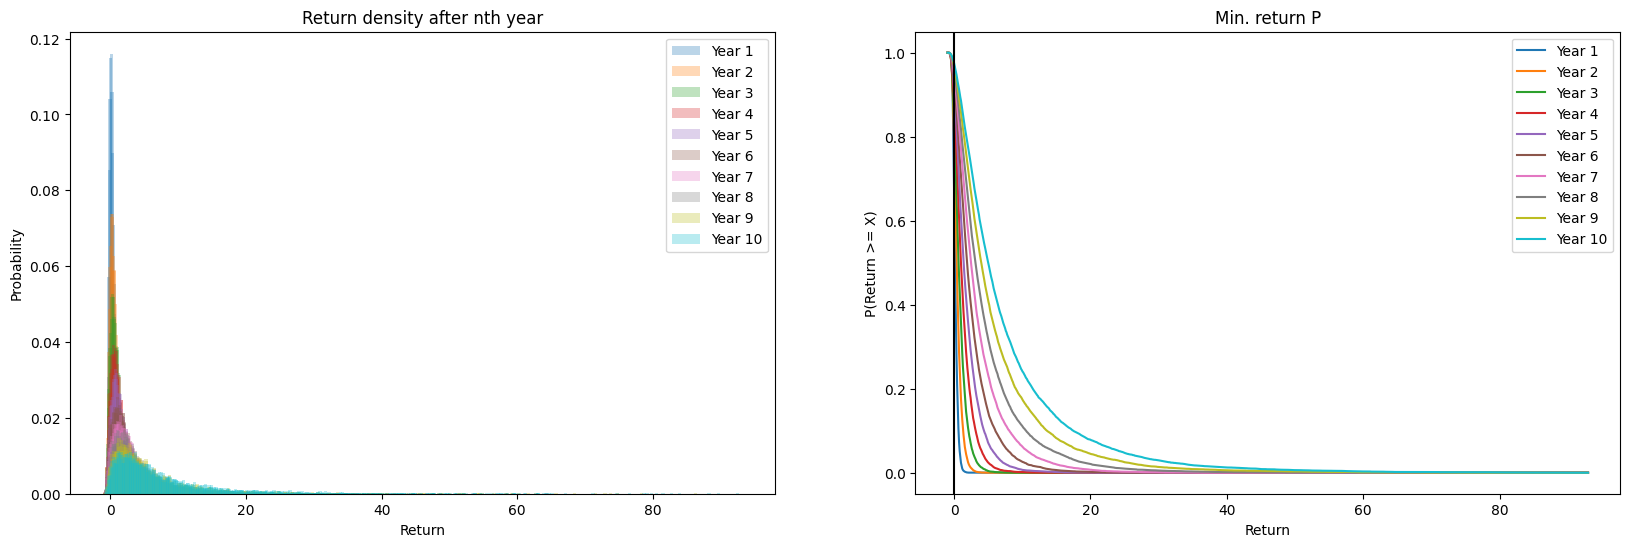

        < 0    > 0   >= 1   >= 2   >= 3   >= 4   >= 5   >= 6   >= 7   >= 8  \
Year                                                                         
1     25.27  74.73   3.17   0.05   0.00   0.00   0.00   0.00   0.00   0.00   
2     17.39  82.61  19.73   3.16   0.47   0.05   0.01   0.01   0.00   0.00   
3     13.25  86.75  38.20  12.05   3.97   1.34   0.43   0.18   0.08   0.03   
4      9.97  90.03  52.33  25.09  11.76   5.53   2.54   1.18   0.61   0.39   
5      7.30  92.70  63.00  37.92  21.98  12.76   7.37   4.59   2.76   1.73   
6      5.74  94.26  72.39  49.13  32.73  21.91  14.83  10.46   7.44   5.19   
7      4.61  95.39  78.30  59.14  43.23  31.60  23.66  17.66  13.20  10.29   
8      3.38  96.62  82.90  67.02  52.30  41.12  32.17  25.54  20.66  16.57   
9      2.68  97.32  86.85  73.78  61.00  50.39  41.47  34.34  28.76  24.34   
10     2.09  97.91  89.20  78.77  68.14  58.50  50.53  43.02  37.26  32.28   

       >= 9  >= 10  
Year                
1      0.00   0.00  


In [16]:
for label in labels:
    print(f"\n=========={label}=============")
    cum_return = plot_traces(np.array(traces[label]))
    print(returns_table(cum_return))